# Clusters
Este modulo contiene un conjunto de distintos ejemplos de clusterizaciones, nos sirve para mostrar el potencial de nbdev y como generar software de forma consistente. 

In [ ]:
#| default_exp Cluster_ejemplo

In [ ]:
#| hide
#| export
import warnings
warnings.filterwarnings('ignore')
from nbdev.showdoc import *
import matplotlib
import sklearn
import random 
import numpy as np
import shapely
#from libpysal.weights import Queen, KNN
from sklearn.cluster import DBSCAN, HDBSCAN, OPTICS, KMeans
import matplotlib.pyplot as plt

# Clase para generar puntos geométricos. 
Vamos hacer una clase para que contenga puntos y que sean ya geometrías. 

In [ ]:
#| export
class data_points:
    """Una clase que contiene a los datos"""
    def __init__(self, n, min_x = 0, min_y = 0, max_x= 1, max_y=1, seed= None):
        if seed != None:
            random.seed(seed)

        Xpoint = np.random.uniform(low= min_x, high= max_x, size=n)
        Ypoint = np.random.uniform(low= min_y, high= max_y, size=n)
        
        #self.Points = np.random.uniform(low= min_x, high= max_x, size=(n, 2))
        self.Points =  [shapely.Point(x[0],x[1]) for x in zip(Xpoint, Ypoint)]
    
    @classmethod
    def from_list(cls, list_points):
        """Se genera los datos usando una lista de puntos"""
        toto = cls(0)
        toto.Points = list_points
        return toto
    
    def get_points(self):
        """Una funcion que para obtener los puntos"""
        return self.Points

    def get_Multypoint(self):
        """Regresa un objeto MultiPoint con los puntos"""
        return shapely.geometry.MultiPoint(self.Points)
    
    def get_X(self):
        """Regresa las coordenadas X"""
        return [x.x for x in self.Points]

    def get_Y(self):
        """Regresa las coordenadas X"""
        return [x.y for x in self.Points]
    
    def centroid(self):
        """Regresa el centroide de los puntos """
        return shapely.centroid(self.get_Multypoint())
    
    def as_array(self):
        """Regresa los puntos como un array"""
        list_arrays = np.array([ (geom.xy[0][0], geom.xy[1][0]) for geom in self.Points])
        return list_arrays

    def add_points(self, data_points):
        """Agrega puntos de otra """
        self.Points = self.Points + data_points.Points
        return 
    
    

In [ ]:
#| hide
datos_simples = data_points(40)


In [ ]:
#| hide
datos_simples.get_points()

[<POINT (0.795 0.843)>,
 <POINT (0.066 0.059)>,
 <POINT (0.693 0.052)>,
 <POINT (0.46 0.885)>,
 <POINT (0.01 0.736)>,
 <POINT (0.319 0.438)>,
 <POINT (0.383 0.124)>,
 <POINT (0.397 0.966)>,
 <POINT (0.913 0.186)>,
 <POINT (0.534 0.126)>,
 <POINT (0.933 0.326)>,
 <POINT (0.465 0.454)>,
 <POINT (0.347 0.632)>,
 <POINT (0.3 0.522)>,
 <POINT (0.594 0.908)>,
 <POINT (0.911 0.026)>,
 <POINT (0.748 0.662)>,
 <POINT (0.784 0.112)>,
 <POINT (0.966 0.947)>,
 <POINT (0.698 0.094)>,
 <POINT (0.32 0.963)>,
 <POINT (0.878 0.193)>,
 <POINT (0.006 0.135)>,
 <POINT (0.494 0.712)>,
 <POINT (0.858 0.41)>,
 <POINT (0.089 0.37)>,
 <POINT (0.642 0.881)>,
 <POINT (0.511 0.51)>,
 <POINT (0.665 0.607)>,
 <POINT (0.595 0.568)>,
 <POINT (0.945 0.485)>,
 <POINT (0.899 0.008)>,
 <POINT (0.95 0.542)>,
 <POINT (0.461 0.825)>,
 <POINT (0.398 0.045)>,
 <POINT (0.43 0.591)>,
 <POINT (0.852 0.835)>,
 <POINT (0.69 0.246)>,
 <POINT (0.821 0.643)>,
 <POINT (0.019 0.597)>]

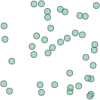

In [ ]:
#| hide
datos_simples.get_Multypoint()

In [ ]:
#| hide
datos_simples.get_X()

[0.7945917829244783,
 0.06578187411519654,
 0.6934124539946642,
 0.46020688723688785,
 0.009782481621570471,
 0.3185846281861334,
 0.38262672656697605,
 0.3971169108115331,
 0.9130311841846304,
 0.5338200854375003,
 0.9333290335477301,
 0.46531804250352893,
 0.34695883014524376,
 0.3002755094078634,
 0.593772987511324,
 0.9113272901981051,
 0.7478719299628266,
 0.7835174623903411,
 0.9662339038900558,
 0.6982334352598917,
 0.319726781142714,
 0.8779611727107268,
 0.005649733114823641,
 0.49353441331559056,
 0.8578361133844915,
 0.08929905175234265,
 0.6419500325543567,
 0.5109732293397716,
 0.6653044403680107,
 0.5951594824179588,
 0.9450734311637116,
 0.8989342624834777,
 0.95038226188307,
 0.46101226379903293,
 0.3978739106582777,
 0.4302255480347207,
 0.8520588952132501,
 0.6903914389340794,
 0.8214511086613753,
 0.019164133136060135]

In [ ]:
#| hide
#| output: false
datos_simples.get_Y()

[0.8432883802649138,
 0.05896623888287289,
 0.051994837716625275,
 0.8851360068967514,
 0.7355855361242122,
 0.43782919367747686,
 0.123681552174424,
 0.9656533035754764,
 0.18646896473991792,
 0.12575610550588967,
 0.3255144488740891,
 0.45439330319594917,
 0.6320984763148514,
 0.5216287511726155,
 0.9078778414434857,
 0.02561347814967896,
 0.6620419220843007,
 0.11172137161838214,
 0.9468156036261416,
 0.09359013977216879,
 0.9628394917945433,
 0.19329103691395477,
 0.134925532439355,
 0.7117215450974994,
 0.4095011879904219,
 0.36954367640615227,
 0.8814211209213836,
 0.5103461728283379,
 0.6072135805601302,
 0.5678405745792837,
 0.48531873338362963,
 0.007764341757959481,
 0.5417658619946415,
 0.8248274503049533,
 0.04538973335035634,
 0.5905912953032616,
 0.8349268973577874,
 0.2457100606773317,
 0.6432933427477687,
 0.5965528238288437]

In [ ]:
#| hide
if len(datos_simples.get_X()) != len(datos_simples.get_Y()):
    raise Exception("Si hay problema la evaluacion ")

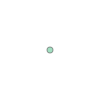

In [ ]:
#| hide
data_points(10).centroid()

In [ ]:
#| hide 
datos_simples.Points

[<POINT (0.795 0.843)>,
 <POINT (0.066 0.059)>,
 <POINT (0.693 0.052)>,
 <POINT (0.46 0.885)>,
 <POINT (0.01 0.736)>,
 <POINT (0.319 0.438)>,
 <POINT (0.383 0.124)>,
 <POINT (0.397 0.966)>,
 <POINT (0.913 0.186)>,
 <POINT (0.534 0.126)>,
 <POINT (0.933 0.326)>,
 <POINT (0.465 0.454)>,
 <POINT (0.347 0.632)>,
 <POINT (0.3 0.522)>,
 <POINT (0.594 0.908)>,
 <POINT (0.911 0.026)>,
 <POINT (0.748 0.662)>,
 <POINT (0.784 0.112)>,
 <POINT (0.966 0.947)>,
 <POINT (0.698 0.094)>,
 <POINT (0.32 0.963)>,
 <POINT (0.878 0.193)>,
 <POINT (0.006 0.135)>,
 <POINT (0.494 0.712)>,
 <POINT (0.858 0.41)>,
 <POINT (0.089 0.37)>,
 <POINT (0.642 0.881)>,
 <POINT (0.511 0.51)>,
 <POINT (0.665 0.607)>,
 <POINT (0.595 0.568)>,
 <POINT (0.945 0.485)>,
 <POINT (0.899 0.008)>,
 <POINT (0.95 0.542)>,
 <POINT (0.461 0.825)>,
 <POINT (0.398 0.045)>,
 <POINT (0.43 0.591)>,
 <POINT (0.852 0.835)>,
 <POINT (0.69 0.246)>,
 <POINT (0.821 0.643)>,
 <POINT (0.019 0.597)>]

# Clase clusters 

Nuestra clase va a usar los datos usando la clase de datos que construimos y vamos a hacer que genere los distintos tipos de clusters, los clusters se almacenaran como etiquetas dentro de la clase . 




In [ ]:
#| hide 
datos_simples = data_points(500, min_x = .75, min_y= .75, max_x= 1, max_y= 1 )

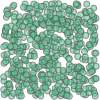

In [ ]:
#| hide
datos_simples.get_Multypoint()

In [ ]:
#| hide
def add_docu(function):
    """A decorator for changing the docstring"""
    def wrapper(*args, **kwargs):
        res = function(*args, **kwargs)
        res
        return res
    return wrapper
    

In [ ]:
#| export

class Clusters:
    """Clase para generar los clusters a partir de un objeto de la clase data_points
    
    Esta clase se utiliza para generar los distintos tipos de clusterizaciones, 
    se almacena los datos en una estructura de datos y se le añaden las respectivas 
    classes
    """
    
    def __init__(self, data_points_i, seed=1234):
        
        if seed != None:
            random.seed(seed)
        
        self.data_structure =  data_points_i
    
    def KMeans(self, **kwargs):
        """
        Se usa el algoritmo Kmeans para la obtencion de clusters, 
        las clases quedan almacenadas en .data_structure_classes_Kmeans.
        Si se desea obtener el modelo se tiene que añadir 
        (ret_model = True) como parámetro.
        """
        kmeans_c = KMeans(**kwargs)
        classes_val = kmeans_c.fit_predict(self.data_structure.as_array())
        self.data_structure.classes_Kmeans = classes_val
        
        if 'ret_model' in kwargs and kwargs['ret_model']==True :
            return  kmeans_c
        

    def DBSCAN(self, **kwargs):
        """
        Se DBSCAN para la obtencion de clusters, las clases quedan almacenadas
        en .data_structure_classes_DBSCAN. Si se desea obtener el modelo se tiene
        que añadir (ret_model = True) como parámetro."""
        db = DBSCAN(**kwargs).fit(self.data_structure.as_array())
        self.data_structure.classes_DBSCAN = db.labels_
        if 'ret_model' in kwargs and kwargs['ret_model']==True :
            return  db
    
    
    def HDBSCAN(self, **kwargs):
        """
        Se HDBSCAN para la obtencion de clusters, las clases quedan almacenadas
        en .data_structure_classes_HDBSCAN. Si se desea obtener el modelo se tiene
        que añadir (ret_model = True) como parámetro.
        """
        hdb = HDBSCAN(**kwargs).fit(self.data_structure.as_array())
        self.data_structure.classes_HDBSCAN = hdb.labels_
        if 'ret_model' in kwargs and kwargs['ret_model']==True : 
            return  hdb
        

    def OPTICS(self, **kwargs):
        """
        Se usa el algoritmo OPTICS para la obtencion de clusters, 
        las clases quedan almacenadas en .data_structure_classes_OPTICS.
        Si se desea obtener el modelo se tiene que añadir 
        (ret_model = True) como parámetro.
        """
        optics=  OPTICS(**kwargs).fit(self.data_structure.as_array())
        self.data_structure.classes_OPTICS = optics.labels_
        
        if 'ret_model' in kwargs and kwargs['ret_model']==True :
            return  optics
        


In [ ]:
show_doc(Clusters)

---

### Clusters

>      Clusters (data_points_i, seed=1234)

Clase para generar los clusters a partir de un objeto de la clase data_points

Esta clase se utiliza para generar los distintos tipos de clusterizaciones, 
se almacena los datos en una estructura de datos y se le añaden las respectivas 
classes

In [ ]:
show_doc(Clusters.KMeans)

---

### Clusters.KMeans

>      Clusters.KMeans (**kwargs)

Se usa el algoritmo Kmeans para la obtencion de clusters, 
las clases quedan almacenadas en .data_structure_classes_Kmeans.
Si se desea obtener el modelo se tiene que añadir 
(ret_model = True) como parámetro.

Al ser posible añadir más cosas dentro de la documentación entonces podemos añadir la documentación de las funciones que se utilizan dentro de la clase. Como en este caso añadimos la documentación de [KMEANS](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) para ver los parametros que se pueden pasar a la función. 

In [ ]:
show_doc(KMeans)

De igual forma hacemos lo mismo con la documentación de [DBSCAN], [HDBSCAN] y [OPTICS]

In [ ]:
show_doc(Clusters.DBSCAN)

---

### Clusters.DBSCAN

>      Clusters.DBSCAN (**kwargs)

Se DBSCAN para la obtencion de clusters, las clases quedan almacenadas
en .data_structure_classes_DBSCAN. Si se desea obtener el modelo se tiene
que añadir (ret_model = True) como parámetro.

In [ ]:
#show_doc(DBSCAN)

In [ ]:
show_doc(Clusters.HDBSCAN)

---

### Clusters.HDBSCAN

>      Clusters.HDBSCAN (**kwargs)

Se HDBSCAN para la obtencion de clusters, las clases quedan almacenadas
en .data_structure_classes_HDBSCAN. Si se desea obtener el modelo se tiene
que añadir (ret_model = True) como parámetro.

In [ ]:
#show_doc(HDBSCAN)

In [ ]:
show_doc(Clusters.OPTICS)

---

### Clusters.OPTICS

>      Clusters.OPTICS (**kwargs)

Se usa el algoritmo OPTICS para la obtencion de clusters, 
las clases quedan almacenadas en .data_structure_classes_OPTICS.
Si se desea obtener el modelo se tiene que añadir 
(ret_model = True) como parámetro.

In [ ]:
#show_doc(OPTICS)

In [ ]:
show_doc(Clusters.OPTICS)

---

### Clusters.OPTICS

>      Clusters.OPTICS (**kwargs)

Se usa el algoritmo OPTICS para la obtencion de clusters, 
las clases quedan almacenadas en .data_structure_classes_OPTICS.
Si se desea obtener el modelo se tiene que añadir 
(ret_model = True) como parámetro.

In [ ]:
#| hide 
cluster_all  = Clusters(datos_simples)
cluster_all.KMeans()

In [ ]:
#| hide
cluster_all.data_structure.classes_Kmeans

array([1, 0, 7, 7, 3, 4, 5, 5, 7, 2, 6, 0, 1, 7, 2, 6, 3, 3, 1, 5, 2, 5,
       2, 7, 3, 6, 6, 0, 5, 1, 0, 0, 2, 3, 2, 3, 1, 3, 2, 6, 2, 6, 7, 3,
       5, 1, 5, 4, 2, 4, 3, 2, 6, 3, 1, 3, 2, 4, 4, 0, 5, 0, 0, 3, 2, 5,
       4, 1, 1, 5, 4, 7, 3, 4, 6, 6, 5, 4, 4, 4, 0, 6, 3, 5, 0, 1, 3, 2,
       5, 5, 7, 0, 5, 4, 4, 1, 4, 4, 3, 1, 0, 5, 2, 4, 2, 0, 2, 7, 4, 0,
       6, 7, 2, 3, 1, 7, 2, 0, 4, 7, 7, 5, 1, 7, 3, 1, 0, 6, 0, 0, 6, 4,
       4, 1, 7, 2, 3, 4, 7, 5, 1, 4, 2, 7, 1, 7, 5, 7, 1, 2, 2, 5, 7, 2,
       7, 2, 2, 7, 6, 6, 2, 7, 0, 3, 2, 3, 5, 6, 7, 7, 5, 7, 0, 3, 1, 4,
       7, 2, 5, 4, 7, 1, 2, 7, 7, 3, 6, 1, 4, 0, 3, 7, 5, 4, 1, 2, 5, 1,
       6, 0, 0, 5, 6, 1, 0, 6, 7, 7, 7, 1, 4, 4, 1, 3, 5, 2, 0, 4, 6, 4,
       1, 1, 5, 6, 6, 7, 2, 1, 0, 5, 2, 5, 2, 0, 4, 6, 6, 3, 2, 2, 7, 2,
       6, 7, 0, 4, 1, 4, 2, 7, 5, 1, 5, 3, 1, 2, 7, 7, 3, 5, 5, 4, 5, 4,
       3, 4, 2, 1, 3, 0, 5, 3, 3, 4, 4, 6, 2, 6, 5, 5, 5, 3, 0, 7, 2, 2,
       4, 4, 7, 1, 4, 4, 1, 0, 4, 6, 3, 7, 0, 2, 7,

In [ ]:
#| hide 
cluster_all.DBSCAN(eps=0.01, min_samples=10)

In [ ]:
#| hide
cluster_all.data_structure.classes_DBSCAN

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [ ]:
#| hide
cluster_all.HDBSCAN()

In [ ]:
#| hide
cluster_all.data_structure.classes_DBSCAN

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [ ]:
#| hide
cluster_all.OPTICS()

In [ ]:
#| hide
cluster_all.data_structure.classes_OPTICS

array([ 0, 15,  5, -1, -1, -1, 12, 12, -1, -1,  2,  6, 24,  4, -1, 17, -1,
       -1, -1, -1, -1, -1,  9, -1, 19,  2, 25, 15, 12, 24, -1, 15, 11, 10,
       -1, -1,  0, 27, -1, 33, -1, 17,  5, -1, -1, 26, -1, 20, -1, -1, 10,
       -1, -1, 16, 24, 10, -1, -1, 20, -1,  7, 13,  6, 18, -1, 13, 22, 26,
        1,  7, 22,  3, -1, 22, 25, 17, -1, -1, -1, -1, -1,  2, 27,  7, -1,
       24, 18, -1, 13, 12, -1, 15, 14, -1, 22,  1, 22, -1, 16, -1, 15, 14,
       -1, 31,  9, -1, 10, -1, 31, 15, -1, -1, -1, -1, 24,  5, -1,  6, 20,
        3, -1, 12, -1, -1, -1, -1, 13, -1,  6, 15, -1, -1, -1, -1, -1, -1,
       10, -1, -1, -1, -1, 22, 29,  4, 24,  3,  8, -1, 24, 11, -1, 13, 33,
       -1, 33, 11, 10, -1, -1, -1, -1,  5,  6, -1, -1, -1, -1, -1, 33,  5,
       -1, -1, 15, 16, -1, 22, -1, -1, 13, -1, -1, -1, -1,  5, -1, 27, 33,
       -1, 21, -1, 16, -1,  7, 22, -1, -1, 13, -1, -1, 32, -1,  8,  2, -1,
       -1, 17, -1,  4, 28, -1, 22, 22, 26, -1, 13, -1, 13, -1, -1, 31,  1,
       -1, -1, -1, -1,  3

# Ejemplo uso clusterizaciones 

Creamos un conjunto de datos usando los distintos metodos en las clases que ya hicimos. 

In [ ]:
datos_simples_3 = data_points(500, min_x = 0.6, min_y= 0.6, max_x= 1.0, max_y= 1.0 )
datos_simples_2 = data_points(500, min_x = 0.0, min_y= 0.6, max_x= 0.4, max_y= 1.0 )
datos_simples_1 = data_points(500, min_x = 0.6, min_y= 0.0, max_x= 1.0, max_y= 0.4 )
datos_simples_0 = data_points(500, min_x = 0.0, min_y= 0.0, max_x= 0.4, max_y= 0.4 )

Añadios los puntos en un sólo objeto

In [ ]:
datos_simples_0.add_points(datos_simples_1)
datos_simples_0.add_points(datos_simples_2)
datos_simples_0.add_points(datos_simples_3)


Veamos los puntos en el objeto `datos_simples_0`

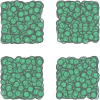

In [ ]:
datos_simples_0.get_Multypoint()

Usando nuestro objeto de la clase `data_points` con los datos (`datos_simple_0`) vamos a generar nuestro objeto de la clase `Clusters` y obtener las distintas clusteraciones.   

In [ ]:
cluster_all  = Clusters(datos_simples_0)

In [ ]:
cluster_all.OPTICS()
cluster_all.HDBSCAN()
cluster_all.DBSCAN(eps=0.1, min_samples=10)
cluster_all.KMeans()

Veamos que los untos se encuentran dentor del objeto. 

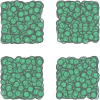

In [ ]:
cluster_all.data_structure.get_Multypoint()

## Hagamos la visualización de los clusters 

Usando nuestro objeto `cluster_all` y las clases 

<matplotlib.collections.PathCollection>

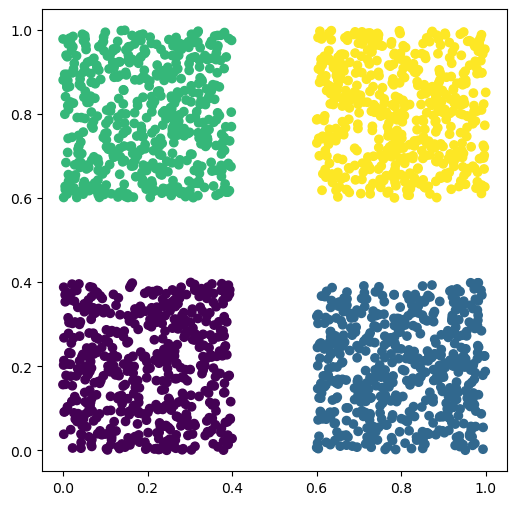

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
color_map = matplotlib.colormaps['viridis'].resampled(len(np.unique(cluster_all.data_structure.classes_DBSCAN)))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(np.unique(cluster_all.data_structure.classes_DBSCAN)))]
plt.scatter(
        cluster_all.data_structure.get_X(),
        cluster_all.data_structure.get_Y(),
        c = cluster_all.data_structure.classes_DBSCAN
        #s = cluster_all.data_structure.classes_DBSCAN,
        #c= colors()
    )

<matplotlib.collections.PathCollection>

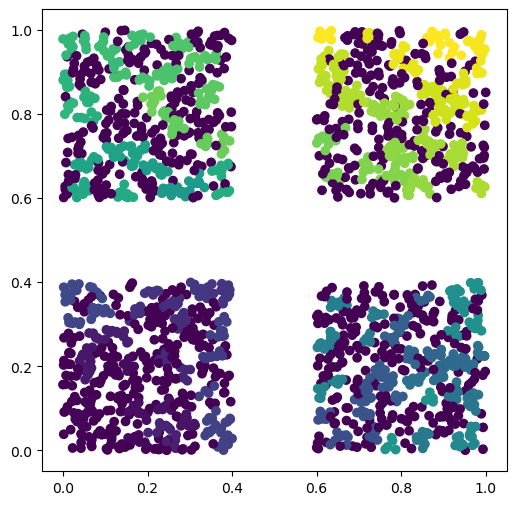

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(
        cluster_all.data_structure.get_X(),
        cluster_all.data_structure.get_Y(),
        c = cluster_all.data_structure.classes_OPTICS
        #s = cluster_all.data_structure.classes_DBSCAN,
        #c= colors()
    )

<matplotlib.collections.PathCollection>

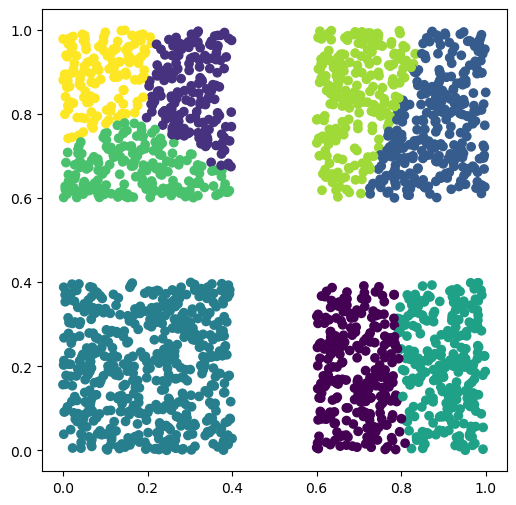

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(
        cluster_all.data_structure.get_X(),
        cluster_all.data_structure.get_Y(),
        c = cluster_all.data_structure.classes_Kmeans
        #s = cluster_all.data_structure.classes_DBSCAN,
        #c= colors()
    )

<matplotlib.collections.PathCollection>

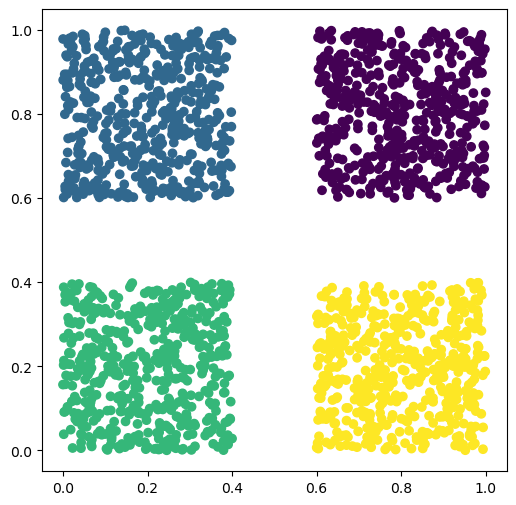

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(
        cluster_all.data_structure.get_X(),
        cluster_all.data_structure.get_Y(),
        c = cluster_all.data_structure.classes_HDBSCAN
        #s = cluster_all.data_structure.classes_DBSCAN,
        #c= colors()
    )

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()